# Linear Equations and Matrices

## Section 1.1 System of Linear Equations

### 1.1.1 Introduction to Linear Algebra

A linear equation is one where all the variables have power of 1 or zero. For example: $ x + 2y + z = 5$.

A set of linear equations is called a *linear system*.

Once we see a linear system, we should ask the following questions.

1. Are there any solutions?
2. Does the system have a unique solution, infinite solutions or no solution?
3. How can we find all the solutions, if they exist?
4. Is there some sort of structure to the solutions?

*Linear algebra* is a systematic exploration of *linear equations*. It has many applications in the fields of functional analysis and quantum mechanics.

With *linear algebra* we can answer questions like: (1) given a set of points, what's the best linear model for them?; (2) given a function, what's the best approximation to it?

### 1.1.2 System of Linear Equations

Below is two linear equations ploted. Note that the intersection point between these equations is the solution of a system of these two linear equations.

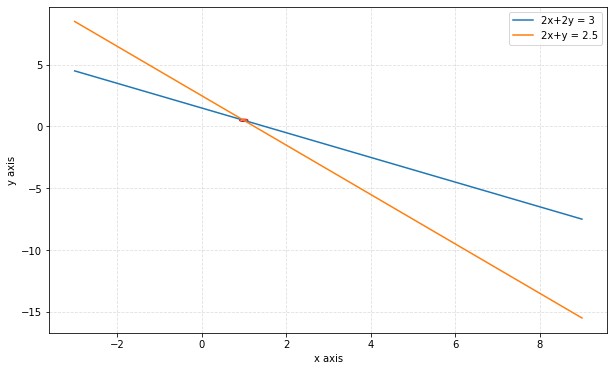

In [1]:
# Import our modules that we are using
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10,6))

# Create the vectors X and Y
x = np.array(range(-3,10))

# Create the plot
plt.plot(x, (3-2*x)/2 ,label='2x+2y = 3')
plt.plot(x, 2.5-2*x ,label='2x+y = 2.5')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('y axis')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a circle to the intersection point :)
ax.add_patch(plt.Circle((1, 1/2), 0.1, color='r', fill=False))

# Add a Legend
plt.legend()

# Show the plot
plt.show()

In general, a system of linear $m$ equations in $n$ unknowns $x_1, x_2, x_3, ..., x_n$ is written mathematically as:

$
a_{11}x_{1} + a_{12}x_{2} + ... + a_{1n}x_{n} = b_{1} \newline
a_{21}x_{1} + a_{12}x_{2} + ... + a_{2n}x_{n} = b_{2} \newline
\vdots +      \vdots +     \vdots + \vdots =    \vdots \newline
a_{m1}x_{1} + a_{m2}x_{2} + ... + a_{mn}x_{n} = b_{m}
$

where $a_{ij}$ and $b_{j}$ represent *real numbers*. The unknowns $x_1, x_2, x_3, ..., x_n$ are placeholders for *real numbers*.

#### *Example 1.1*: Solve the linear equation below.

$2x+2y = 3 \newline
2x+y=2.5$



Solving using substitution method...

$y = 2.5-2x\newline
\rule{2cm}{0.4pt} \newline
2x+2(2.5-2x) = 3 \newline
2x+5-4x = 3 \newline
5-2x = 3 \newline
x = (-2)/-2 \newline
x = 1 \newline
\rule{2cm}{0.4pt} \newline
y = 2.5-2x \newline
y = 2.5-2 \newline
y = 1/2
$

#### *Example 1.2* Solve

$9x+3y = 6 \newline
2x-7y=9$

In [2]:
from sympy import *
from sympy.solvers.solveset import linsolve

x, y = symbols('x, y')
linsolve([9*x+3*y-6, 2*x-7*y-9], (x, y))

FiniteSet((1, -1))

We can carry out the following operations on linear system of equations:

1. Interchange any pair of equations;
2. Multiply an equation by a non-zero constant;
3. Add or subtract one equation from another.

#### *Example 1.3* Solve

$x + 2y + 4z = 7 \newline
3x + 7y + 2z = -11 \newline
2x + 3y + 3z = 1$

In [3]:
x, y, z = symbols('x, y, z')

linsolve([x+2*y+4*z-7, 3*x+7*y+2*z+11, 2*x+3*y+3*z-1], (x, y, z))

FiniteSet((-1, -2, 3))

The equations above can be represented by a plane in a three-dimensional system. The solution above is the point of intersection of three planes.

#### *Example 1.4* Solve

$2x+3y = 6 \newline
4x+6y=9$

In [5]:
x, y = symbols('x, y')

linsolve([2*x+3*y-6, 4*x+6*y-9], (x, y))

EmptySet

There is no solution for this system of equations because we have a contradiction here (0 = 3). This kind of system is called *inconsistent*.

#### *Example 1.5* Solve

$2x+3y = 6 \newline
4x+6y=12$

In [6]:
linsolve([2*x+3*y-6, 4*x+6*y-12], (x, y))

FiniteSet((3 - 3*y/2, y))

Here we have infinite solutions.

## Section 1.2 Gaussian Elimination

### 1.2.1 Introduction to matrices

These two equations

$2x+2y = 3 \newline
2x+y=2.5$

can be represented as

$
\begin{pmatrix}
2 & 2 & 3\\
2 & 1 & 2.5
\end{pmatrix}
$

The table below

In [7]:
import pandas as pd
  
data = {'Strawberry': [12, 15, 10, 16, 12],
        'Vanilla': [5, 9, 14, 7, 10],
        'Chocolate': [8, 12, 10, 9, 15]}
  
df = pd.DataFrame(data).T
df.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
  
df

,Monday,Tuesday,Wednesday,Thursday,Friday
Strawberry,12,15,10,16,12
Vanilla,5,9,14,7,10
Chocolate,8,12,10,9,15


Can be represented in a matrix as

$
\begin{pmatrix}
12 & 15 & 10 & 16 & 12\\
5 & 9 & 14 & 7 & 10 \\
8 & 12 & 10 & 9 & 15
\end{pmatrix}
$

### 1.2.2 Elementary row operations

Augmented matrix is a matrix containing the coefficients of the unknowns and the constant values on the right hand side of the equations. See an example below:

#### *Example 1.6* Write the augmented matrix of this linear system.

$x+2y+4z = 7 \newline
3x+7y+2z=-11 \newline
2x+3y+3z = 1$

Solution:

$\left(\begin{array}{ccc|c}  
 1 & 2 & 4 & 7\\  
 3 & 7 & 2 & -11\\
 2 & 3 & 3 & 1
\end{array}\right)$

We can perform any elementary row operation in an augmented matrix.

### 1.2.3 Gaussian Elimination

This method allow us to find and solve a much easier (row equivalent) linear system, instead of the original linear equation and get the same results.

#### *Example 1.7* Solve this linear equation with Gaussian Elimination.

$x-3y+5z = -9 \newline
2x-y-3z= 19 \newline
3x+y+4z = -13$

It can be represented as:

$\left(\begin{array}{ccc|c}  
 1 & -3 & 5 & -9\\  
 2 & -1 & -3 & 19\\
 3 & 1 & 4 & -13
\end{array}\right)$

Therefore:

In [8]:
from sympy import Matrix

matrix = Matrix([[1, -3, 5, -9], [2, -1, -3, 19], [3, 1, 4, -13]])
matrix

Matrix([
[1, -3,  5,  -9],
[2, -1, -3,  19],
[3,  1,  4, -13]])

Applying $R_{2}^{*} = R_{2} - 2R_{1}$ we have:

In [10]:
matrix = Matrix([[1,0,0],[-2,1,0],[0,0,1]]) * matrix
matrix

Matrix([
[1, -3,   5,  -9],
[0,  5, -13,  37],
[3,  1,   4, -13]])

Applying $R_{3}^{*} = R_{2} - 3R_{1}$ we have:

In [11]:
matrix = Matrix([[1,0,0],[0,1,0],[-3,0,1]]) * matrix
matrix

Matrix([
[1, -3,   5, -9],
[0,  5, -13, 37],
[0, 10, -11, 14]])

In [12]:
matrix = Matrix([[1,0,0],[0,1,0],[0,-2,1]]) * matrix
matrix

Matrix([
[1, -3,   5,  -9],
[0,  5, -13,  37],
[0,  0,  15, -60]])

This representation is row equivalent of our original representation. Now we can perform a back substitution to solve this system.

$15z = -60 \newline
z = -4 \newline
---- \newline
5y - 13z = 37 \newline
5y - 13(-4) = 37\newline
5y = 37-52 \newline
5y = -15 \newline
y = -3 \newline
---- \newline
x - 3y + 5z = -9 \newline
x - 3(-3) + 5(-4) = -9 \newline
x = -9 - 9 + 20 \newline
x = 2 \newline
---- \newline \newline
{x = 2, y = -3, z = -4}$

Checking the results with Sympy 

In [13]:
from sympy import *

x, y, z = symbols('x y z')
system = A, b = matrix[:, :-1], matrix[:, -1]
linsolve(system, x, y, z)

FiniteSet((2, -3, -4))

#### *Example 1.8* Solve this linear equation with Gaussian Elimination.

$x+3y+2z = 13 \newline
4x+4y-3z= 3 \newline
5x+y+2z = 13$

In [14]:
from sympy import Matrix

matrix = Matrix([[1, 3, 2, 13], [4, 4, -3, 3], [5, 1, 2, 13]])
matrix

Matrix([
[1, 3,  2, 13],
[4, 4, -3,  3],
[5, 1,  2, 13]])

In [15]:
matrix = Matrix([[1,0,0],[-4,1,0],[0,0,1]]) * matrix
matrix

Matrix([
[1,  3,   2,  13],
[0, -8, -11, -49],
[5,  1,   2,  13]])

In [16]:
matrix = Matrix([[1,0,0],[0,1,0],[-5,0,1]]) * matrix
matrix

Matrix([
[1,   3,   2,  13],
[0,  -8, -11, -49],
[0, -14,  -8, -52]])

In [17]:
matrix = Matrix([[1,0,0],[0,1,0],[0,-14/8,1]]) * matrix
matrix

Matrix([
[1,  3,     2,    13],
[0, -8,   -11,   -49],
[0,  0, 11.25, 33.75]])

In [18]:
z = 33.75/11.25
y = (-49 + 11*z)/-8
x = 13-3*y-2*z
x,y,z

(1.0, 2.0, 3.0)

Checking the results with Sympy 

In [19]:
from sympy import *

x, y, z = symbols('x y z')
system = A, b = matrix[:, :-1], matrix[:, -1]
linsolve(system, x, y, z)

FiniteSet((1.0, 2.0, 3.0))

#### Reduced Row Echelon Form

An even beter representation of our original matrix would be the reduced row echelon form (rref). A matrix is in rref format if:

* The rows containing only zero entries are located in the bottom part of the matrix;
* The rows with non-zero entries has 1 as the first value left to right (leading value);
* The leading 1's of two consecutive non-zero rows go strictly from top left to bottom right of the matrix;
* The only non-zero entry in a column containing a leading 1 is the leading 1.

If the last rule is not satisfied, we say that the matrix is in row echelon form (ref).

#### *Example 1.9 (adapted)* Place the following linear system into reduced row echelon form.

$1x+5y-3z = -9 \newline
0x-13y-5z= 37 \newline
0x+0y+5z = -15$

In [20]:
from sympy import Matrix

matrix = Matrix([[1, 5, -3, -9], [0, -13, -5, 37], [0, 0, 5, -15]])
matrix

Matrix([
[1,   5, -3,  -9],
[0, -13, -5,  37],
[0,   0,  5, -15]])

In [21]:
matrix = Matrix([[1,0,0],[0,1,0],[0,0,1/5]]) * matrix
matrix

Matrix([
[1,   5,  -3,   -9],
[0, -13,  -5,   37],
[0,   0, 1.0, -3.0]])

In [22]:
matrix = Matrix([[1,0,0],[0,1,5],[0,0,1]]) * matrix
matrix

Matrix([
[1,   5,  -3,   -9],
[0, -13,   0, 22.0],
[0,   0, 1.0, -3.0]])

In [23]:
matrix = Matrix([[1,0,0],[0,-1/13,0],[0,0,1]]) * matrix
matrix

Matrix([
[1,   5,  -3,                -9],
[0, 1.0,   0, -1.69230769230769],
[0,   0, 1.0,              -3.0]])

In [24]:
matrix = Matrix([[1,0,3],[0,1,0],[0,0,1]]) * matrix
matrix

Matrix([
[1,   5,   0,             -18.0],
[0, 1.0,   0, -1.69230769230769],
[0,   0, 1.0,              -3.0]])

In [25]:
matrix = Matrix([[1,-5,0],[0,1,0],[0,0,1]]) * matrix
matrix

Matrix([
[1,   0,   0, -9.53846153846154],
[0, 1.0,   0, -1.69230769230769],
[0,   0, 1.0,              -3.0]])

In [26]:
from sympy import *

x, y, z = symbols('x y z')

matrix = Matrix([[1, 5, -3, -9], [0, -13, -5, 37], [0, 0, 5, -15]])
system = A, b = matrix[:, :-1], matrix[:, -1]

linsolve(system, x, y, z)

FiniteSet((-124/13, -22/13, -3))

In [27]:
matrix.rref()

(Matrix([
 [1, 0, 0, -124/13],
 [0, 1, 0,  -22/13],
 [0, 0, 1,      -3]]),
 (0, 1, 2))

The rref is unique. I'll prove that later.

## Section 1.3 Vector Arithmetic

Vectors are natural representation of magnitude and direction. Such a thing we cannot achieve with scalars.

### 1.3.1 Vectors and Scalars

"walk due north for 5 kilometers" can be expressed with a vector. It's magnitude is "5 km" and its direction is "due north". 

* Scalar is a number that measures the size of a particular quantity.
* Vector represents direction and magnitude.

A vector from $O$ to $A$ can be written as $\overrightarrow{OA}$, in bold typeface $\bf a$ or $\overrightarrow{a}$ and can be represented as:

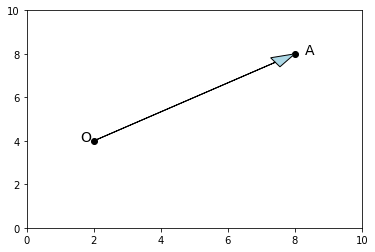

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import math

a = [2.0,4.0]
b = [8.0,8.0]

head_length = 0.7

dx = b[0] - a[0]
dy = b[1] - a[1]

vec_ab = [dx,dy]

vec_ab_magnitude = math.sqrt(dx**2+dy**2)

dx = dx / vec_ab_magnitude
dy = dy / vec_ab_magnitude

vec_ab_magnitude = vec_ab_magnitude - head_length

ax = plt.axes()

ax.arrow(a[0], a[1], vec_ab_magnitude*dx, vec_ab_magnitude*dy, head_width=0.5, head_length=0.7, fc='lightblue', ec='black')

plt.scatter(a[0],a[1],color='black')
plt.scatter(b[0],b[1],color='black')

ax.annotate('O', (a[0]-0.4,a[1]),fontsize=14)
ax.annotate('A', (b[0]+0.3,b[1]),fontsize=14)

plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

### 1.3.2 Vector addition or scalar multiplication

The result of adding two vectors $\bf a$ and $\bf b$ is the diagonal paralelogram $\bf a + b$.

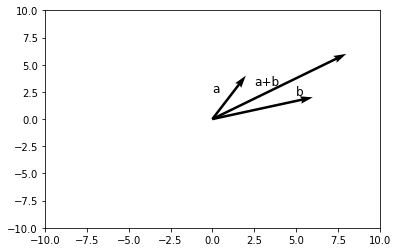

In [29]:
ax = plt.axes()

ax.annotate('a', (0, 2.5),fontsize=12)
ax.annotate('a+b', (2.5, 3.1),fontsize=12)
ax.annotate('b', (5, 2.2),fontsize=12)

plt.quiver([0, 0, 0], [0, 0, 0], [3, 1, 4], [1, 2, 3], angles='xy', scale_units='xy', scale=0.5)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

The vector addition for $\mathbb{R}^{3}$ is defined as:

$
\begin{pmatrix}
  a \\
  b \\
  c
\end{pmatrix}
\begin{pmatrix}
  d \\
  e \\
  f
\end{pmatrix}
=
\begin{pmatrix}
  a+d \\
  b+e \\
  c+f
\end{pmatrix}
$

* The multiplication of a vector by a scalar, denoted as $k.\bf a$ is the product of the size of $\bf a$ with the number k.

The scalar multiplication for $\mathbb{R}^{3}$ can be defined as:

$
k
\begin{pmatrix}
  a \\
  b \\
  c
\end{pmatrix}
=
\begin{pmatrix}
  ka \\
  kb \\
  kc
\end{pmatrix}
$

The same rules hold for for $\mathbb{R}^{n}$ space.

* Equality

$
\begin{pmatrix}
  u_{1} \\
  u_{2} \\
  u_{3}
\end{pmatrix}
=
\begin{pmatrix}
  v_{1} \\
  v_{2} \\
  v_{2}
\end{pmatrix}
$

if and only if the entries $u_{i} = v_{i}$ for $j = 1,2,3$

### 1.3.6 Introduction to the dot (inner) product

Let $\bf a$ = $
\begin{pmatrix}
  u_{1} \\
  u_{2} \\
  \vdots \\
  u_{n}
\end{pmatrix}
$ and 
$\bf b$ = $
\begin{pmatrix}
  v_{1} \\
  v_{2} \\
  \vdots \\
  v_{n}
\end{pmatrix}
$
be vectors in $\mathbb{R}^{n}$, then the dot product of $\bf u$ and $\bf v$ which is denoted by $\textbf{u.v}$ is given by
$\textbf{u.v} = u_{1}.v_{1}+u_{2}.v_{2}+ ... + u_{n}.v_{n}$

#### *Example 1.13*

Let $\bf u$ = $
\begin{pmatrix}
  -3 \\
  1 \\
  7
\end{pmatrix}
$ and 
$\bf v$ = $
\begin{pmatrix}
  9 \\
  2 \\
  -4
\end{pmatrix}
$
. Find $\textbf{u.v}$.

$
\textbf{u.v} = 
\begin{pmatrix}
  -3 \\
  1 \\
  7
\end{pmatrix}
.
\begin{pmatrix}
  9 \\
  2 \\
  -4
\end{pmatrix}
$ = (-3)*9 + 1*2 + -4*7 = -53

### 1.3.7 Linear combination of vectors

Let $v_{1},v_{2}+ ... + v_{n}$ be vectors and $k_{1},k_{2}+ ... + k_{n}$ scalars, then the dot product 

$
\begin{pmatrix}
  u_{1} \\
  u_{2} \\
  \vdots \\
  u_{n}
\end{pmatrix}
$.$
\begin{pmatrix}
  v_{1} \\
  v_{2} \\
  \vdots \\
  v_{n}
\end{pmatrix}
$ = $k_{1}.v_{1}+k_{2}.v_{2}+ ... + k_{n}.v_{n}$ is a $linear\,combination$.

## Section 1.4 Arithmetic of Matrics